In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q1  
The data set of size n = 15 (Yield data) contains measurements of yield from an experiment done at  
five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit.  
The table below gives the data used for this analysis.  
i Temp. Yield  
1 50 3.3  
2 50 2.8  
3 50 2.9  
4 70 2.3  
5 70 2.6  
6 70 2.1  
7 80 2.5  
8 80 2.9  
9 80 2.4  
10 90 3.0  
11 90 3.1  
12 90 2.8  
13 100 3.3  
14 100 3.5  
15 100 3.0  
a. Create a CSV file with sample data.  
b. Write a Python function program to:  
Find the fitted simple linear and polynomial regression equations for the given data.  
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with  
your program.  
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit  
and a quadratic fit overlayed.  
e. Compute the error, MSE, and RMSE.  

In [23]:
"""
a. Create a CSV file with sample data. 
"""

data = {
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [24]:
"""
b. Write a Python function program to:
Find the fitted simple linear and polynomial regression equations for the given data.
"""

def fit_regression_equations(df):
    # Simple Linear Regression
    x = df['Temp'].to_numpy()
    y = df['Yield'].to_numpy()
    # xb, yb = x.mean(), y.mean()
    # a, b = 0, 0
    # for i in range(len(x)):
    #     a += (x[i] - xb) * (y[i] - yb)
    #     b += (x[i] - xb) ** 2
    # b0 = a / b
    # b1 = yb - (b0 * xb)

    dx, dy = x - x.mean(), y - y.mean()
    b1 = np.sum(dx * dy) / np.sum(dx * dx)
    b0 = y.mean() - b1 * x.mean()
    
    # Polynomial Regression (Quadratic)
    a, b, c, d, e, f, g, h = len(x), x.sum(), 0, 0, 0, y.sum(), 0, 0
    for i in range(len(x)):
        c += x[i] ** 2
        d += x[i] ** 3
        e += x[i] ** 4
        g += x[i] * y[i]
        h += (x[i] ** 2) * y[i]
    A = np.array([a, b, c, b, c, d, c, d, e]).reshape((3,3))
    B = np.array([f, g, h]).reshape((3, 1))
    C = np.linalg.inv(A)
    ans = C.dot(B)

    return (b0, b1), ans.flatten()

df = pd.read_csv('data.csv')
(b0, b1), ans = fit_regression_equations(df)
ans

array([ 7.96048110e+00, -1.53711340e-01,  1.07560137e-03])

In [25]:
"""
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with
your program.
"""

# Assuming the coefficients are already calculated and stored in variables
# For Simple Linear Regression: b0, b1
# For Polynomial Regression: ans (which is a flattened array containing the coefficients)

# The coefficients can be printed or compared as needed within the program or externally.


'\nc. Compare the coefficients obtained from manually intuitive and matrix formulation methods with\nyour program.\n'

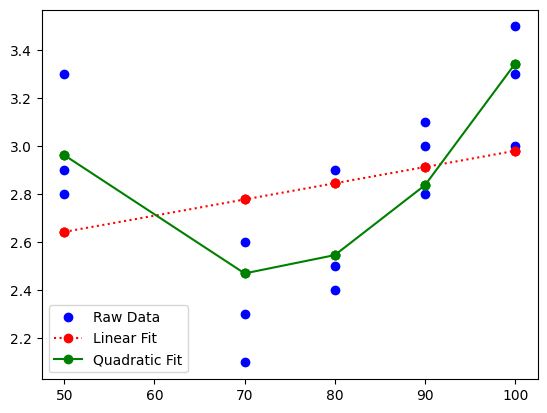

In [26]:
"""
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit
and a quadratic fit overlayed.
"""

def plot_regression_fits(df):
    x = df['Temp'].to_numpy()
    y = df['Yield'].to_numpy()
    (b0, b1), ans = fit_regression_equations(df)
    
    # Predictions for Simple Linear Regression
    slr_predict = b0 + b1 * x
    
    # Predictions for Polynomial Regression
    pr_predict = ans[0] + (ans[1] * x) + (ans[2] * (x ** 2))
    
    # Plotting
    fig, ax = plt.subplots()
    ax.plot(x, y, 'bo', label='Raw Data')
    ax.plot(x, slr_predict, 'ro:', label='Linear Fit')
    ax.plot(x, pr_predict, 'go-', label='Quadratic Fit')
    ax.legend()
    plt.show()

plot_regression_fits(df)

In [27]:
"""
e. Compute the error, MSE, and RMSE.
"""

def compute_errors(df):
    x = df['Temp'].to_numpy()
    y = df['Yield'].to_numpy()
    (b0, b1), ans = fit_regression_equations(df)
    
    # Predictions
    slr_predict = (b0 * x) + b1
    pr_predict = ans[0] + (ans[1] * x) + (ans[2] * (x ** 2))
    
    # Errors
    slr_errors = y - slr_predict
    pr_errors = y - pr_predict
    
    # MSE
    slr_mse = np.mean(slr_errors ** 2)
    pr_mse = np.mean(pr_errors ** 2)
    
    # RMSE
    slr_rmse = np.sqrt(slr_mse)
    pr_rmse = np.sqrt(pr_mse)
    
    return slr_errors, pr_errors, slr_mse, slr_rmse, pr_mse, pr_rmse

error_linear, error_polynomial, mse_linear, mse_polynomial, rmse_linear, rmse_polynomial = compute_errors(df)

print(f'Error (Linear): {error_linear}')
print(f'Error (Polynomial): {error_polynomial}')
print(f'MSE (Linear): {mse_linear}')
print(f'MSE (Polynomial): {mse_polynomial}')
print(f'RMSE (Linear): {rmse_linear}')
print(f'RMSE (Polynomial): {rmse_polynomial}')

Error (Linear): [-112.02207207 -112.52207207 -112.42207207 -159.1481982  -158.8481982
 -159.3481982  -182.01126126 -181.61126126 -182.11126126 -204.57432432
 -204.47432432 -204.77432432 -227.33738739 -227.13738739 -227.63738739]
Error (Polynomial): [ 0.33608247 -0.16391753 -0.06391753 -0.17113402  0.12886598 -0.37113402
 -0.04742268  0.35257732 -0.14742268  0.16116838  0.26116838 -0.03883162
 -0.04536082  0.15463918 -0.34536082]
MSE (Linear): 32917.48532314745
MSE (Polynomial): 181.4317649232004
RMSE (Linear): 0.04778465063001152
RMSE (Polynomial): 0.2185970050801509


2. When heart muscle is deprived of oxygen, the tissue dies and leads to a heart attack ("myocardial   
infarction"). Apparently, cooling the heart reduces the size of the heart attack. It is not known, however,   
whether cooling is only effective if it takes place before the blood, flow to the heart becomes restricted.   
Some researchers (Hale, et al, 1997) hypothesized that cooling the heart would be effective in reducing   
the size of the heart attack even if it takes place after the blood flow becomes restricted.  
To investigate their hypothesis, the researchers conducted an experiment on 32 anesthetized rabbits   
that were subjected to a heart attack. The researchers established three experimental groups:  
 Rabbits whose hearts were cooled to 6º C within 5 minutes of the blocked artery ("early cooling")  
 Rabbits whose hearts were cooled to 6º C within 25 minutes of the blocked artery ("late cooling")  
 Rabbits whose hearts were not cooled at all ("no cooling")  
At the end of the experiment, the researchers measured the size of the infarcted (i.e., damaged) area (in   
grams) in each of the 32 rabbits. But, as you can imagine, there is great variability in the size of hearts.   
The size of a rabbit's infarcted area may be large only because it has a larger heart. Therefore, in order   
to adjust for differences in heart sizes, the researchers also measured the size of the region at risk for   
infarction (in grams) in each of the 32 rabbits.  
Infarc Area Group X2 X3  
0.119 0.34 3 0 0  
0.19 0.64 3 0 0  
0.395 0.76 3 0 0  
0.469 0.83 3 0 0  
0.13 0.73 3 0 0  
0.311 0.82 3 0 0  
0.418 0.95 3 0 0  
0.48 1.06 3 0 0  
0.687 1.2 3 0 0  
0.847 1.47 3 0 0  
0.062 0.44 1 1 0  
0.122 0.77 1 1 0  
0.033 0.9 1 1 0  
0.102 1.07 1 1 0  
0.206 1.01 1 1 0  
0.249 1.03 1 1 0  
0.22 1.16 1 1 0  
0.299 1.21 1 1 0  
0.35 1.2 1 1 0  
0.35 1.22 1 1 0  
0.588 0.99 1 1 0  
0.379 0.77 2 0 1  
0.149 1.05 2 0 1  
0.316 1.06 2 0 1  
0.39 1.02 2 0 1  
0.429 0.99 2 0 1  
0.477 0.97 2 0 1  
0.439 1.12 2 0 1  
0.446 1.23 2 0 1  
0.538 1.19 2 0 1  
0.625 1.22 2 0 1  
0.974 1.4 2 0 1  
With their measurements in hand, the researchers' primary research question was: Does the mean size   
of the infarcted area differ among the three treatment groups — no cooling, early cooling, and late   
cooling — when controlling for the size of the region at risk for infarction?  
A regression model that the researchers might use in answering their research question is:  
yi=(β0+β1xi1+β2xi2+β3xi3)+ϵi  
where:  
 yi is the size of the infarcted area (in grams) of rabbit i  
 xi1 is the size of the region at risk (in grams) of rabbit i  
 xi2 = 1 if early cooling of rabbit i, 0 if not  
 xi3 = 1 if late cooling of rabbit i, 0 if not  
and the independent error terms εi follow a normal distribution with mean 0 and equal variance σ  
2  
.  
Illustrates the need for being able to "translate" a research question into a statistical procedure. Often,   
the procedure involves four steps, namely:  
 formulating a multiple regression model  
 determining how the model helps answer the research question  
 checking the model  
 and performing a hypothesis test (or calculating a confidence interval)  
a. Create a CSV file with sample data.  
b. Write a Python function program to:  
Find the fitted multiple linear regression equation for the given data.  
c. Compare the coefficients obtained manually using intuitive and matrix formulation methods with   
your program.  
d. Plot the data adorned with the estimated regression equation.  
e. Compute the error, MSE, and RMSE.  
Note: Do not use scikit-learn  

In [28]:
"""
a. Create a CSV file with sample data.
"""

data = """
Infarc Area Group X2 X3
0.119 0.34 3 0 0
0.19 0.64 3 0 0
0.395 0.76 3 0 0
0.469 0.83 3 0 0
0.13 0.73 3 0 0
0.311 0.82 3 0 0
0.418 0.95 3 0 0
0.48 1.06 3 0 0
0.687 1.2 3 0 0
0.847 1.47 3 0 0
0.062 0.44 1 1 0
0.122 0.77 1 1 0
0.033 0.9 1 1 0
0.102 1.07 1 1 0
0.206 1.01 1 1 0
0.249 1.03 1 1 0
0.22 1.16 1 1 0
0.299 1.21 1 1 0
0.35 1.2 1 1 0
0.35 1.22 1 1 0
0.588 0.99 1 1 0
0.379 0.77 2 0 1
0.149 1.05 2 0 1
0.316 1.06 2 0 1
0.39 1.02 2 0 1
0.429 0.99 2 0 1
0.477 0.97 2 0 1
0.439 1.12 2 0 1
0.446 1.23 2 0 1
0.538 1.19 2 0 1
0.625 1.22 2 0 1
0.974 1.4 2 0 1
"""

# Write the data to a CSV file
with open('data2.csv', 'w') as f:
    f.write(data.replace(' ', ','))

In [33]:
"""
b. Write a Python function program to:
Find the fitted multiple linear regression equation for the given data.
"""

def fit_multiple_linear_regression(df):
    x = df[['Area', 'X2', 'X3']].to_numpy()
    y = df['Infarc'].to_numpy()

    # y = b0 + b1*x1 + b2*x2 + b3*x3 + e
    # y = a + bX + e
    # coefficients = (X^T X)^{-1} X^T y

    X = np.c_[np.ones(x.shape[0]), x]
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    b0, b1, b2, b3 = coefficients

    return b0, b1, b2, b3


df = pd.read_csv('data2.csv')
b0, b1, b2, b3 = fit_multiple_linear_regression(df)
print(f'Infarc = {b0} + {b1} * Area + {b2} * X2 + {b3} * X3')

Infarc = -0.13453637823601383 + 0.6126549752681979 * Area + -0.24348223339582045 * X2 + -0.06565569473887138 * X3


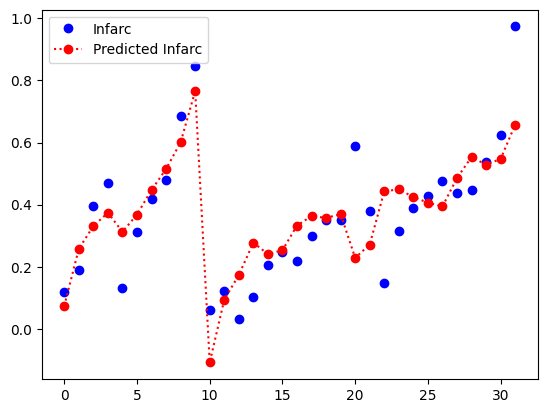

In [35]:
"""
d. Plot the data adorned with the estimated regression equation
"""

def plot_regression_line(df):
    x = df[['Area', 'X2', 'X3']].to_numpy()
    y = df['Infarc'].to_numpy()
    b0, b1, b2, b3 = fit_multiple_linear_regression(df)
    
    # Predictions
    y_predict = b0 + (b1 * x[:, 0]) + (b2 * x[:, 1]) + (b3 * x[:, 2])
    
    # Plot raw data as scatter plot and overlay the regression line
    fig, ax = plt.subplots()
    ax.plot(y, 'bo', label='Infarc')
    ax.plot(y_predict, 'ro:', label='Predicted Infarc')
    ax.legend()
    plt.show()

plot_regression_line(df)

In [14]:
"""
e. Compute the error, MSE, and RMSE.
"""

def compute_errors(df):
    x = df[['Area', 'X2', 'X3']].to_numpy()
    y = df['Infarc'].to_numpy()
    b0, b1, b2, b3 = fit_multiple_linear_regression(df)
    
    # Predictions
    y_predict = b0 + (b1 * x[:, 0]) + (b2 * x[:, 1]) + (b3 * x[:, 2])
    
    # Errors
    errors = y - y_predict
    
    # MSE
    mse = np.mean(errors ** 2)
    
    # RMSE
    rmse = np.sqrt(mse)
    
    return errors, mse, rmse

errors, mse, rmse = compute_errors(df)

print(f'Errors: {errors}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Errors: [ 0.04523369 -0.06756281  0.0639186   0.09503275 -0.18270175 -0.0568407
 -0.02948585 -0.0348779   0.08635041  0.08093356  0.17045042  0.02827428
 -0.14037087 -0.17552221 -0.03476291 -0.00401601 -0.11266116 -0.06429391
 -0.00716736 -0.01942046  0.35949019  0.10744774 -0.29409565 -0.1332222
 -0.034716    0.02266365  0.08291675 -0.0469815  -0.10737355  0.00913265
  0.077753    0.31647511]
MSE: 0.017028422624564204
RMSE: 0.13049299837372197
